In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('temp.csv')

In [16]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.set_index('Date',inplace=True)

In [19]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


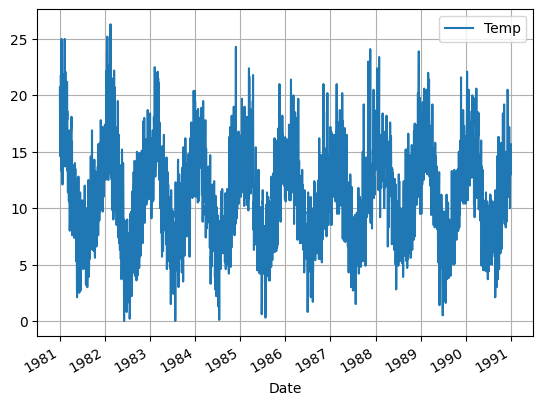

In [44]:
df.plot()
plt.grid()

In [21]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(df)

In [38]:
print("Test Statistic = ",results[0])
print("P-value = ",results[1])
print("No of lages used = ",results[2])
print("P-value = ",results[1])
print("""Critical Values :- 
      1% = {},
      5% = {},
      10% = {}""".format(results[4]['1%'],results[4]['5%'],results[4]['10%']))

Test Statistic =  -4.444804924611686
P-value =  0.0002470826300361126
No of lages used =  20
P-value =  0.0002470826300361126
Critical Values :- 
      1% = -3.4321532327220154,
      5% = -2.862336767636517,
      10% = -2.56719413172842


C:\Users\akhil\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


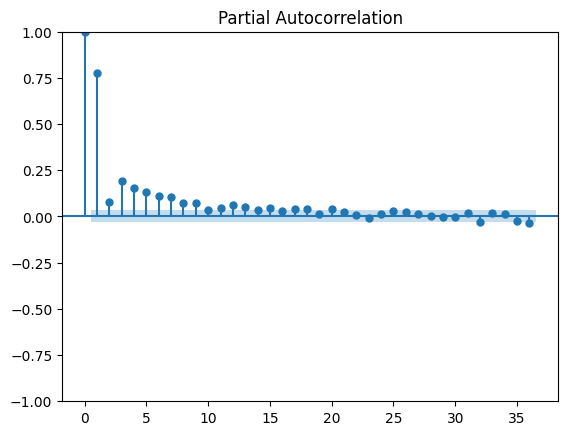

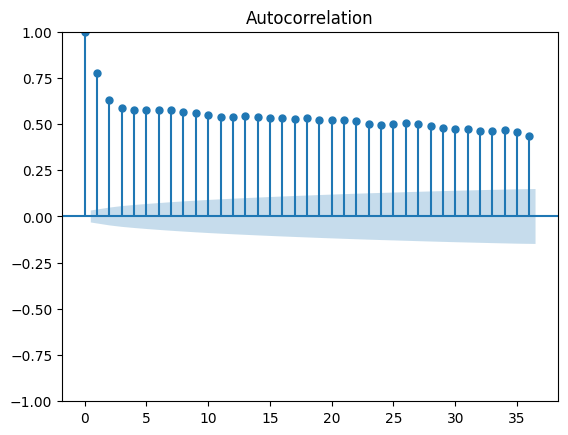

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(df['Temp'])
plot_acf(df['Temp'])
plt.show()

In [49]:
X = df.values
train = X[:len(X)-7]
test = X[len(X)-7:]
print(X.shape,train.shape,test.shape)

(3650, 1) (3643, 1) (7, 1)


In [58]:
from statsmodels.tsa.ar_model import AutoReg
ar = AutoReg(train,lags = 10).fit()

In [59]:
print(ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Wed, 17 Jan 2024   AIC                          16775.028
Time:                        22:29:32   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [60]:
pred = ar.predict(start=len(train),end = len(X)-1,dynamic=False)

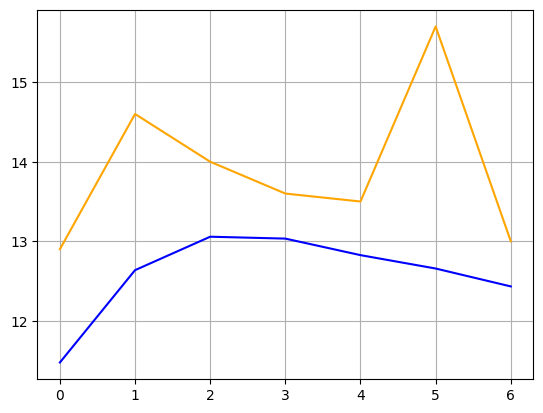

In [62]:
plt.plot(pred,color = 'blue')
plt.plot(test,color = 'orange')
plt.grid()

In [63]:
pred = ar.predict(start = len(X)+1, end = len(X)+7,dynamic = False)

In [69]:
print("Future predictions are :-",pred)

Future predictions are :- [12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712]
